In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
notusing =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.0,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.5, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 10, #100
    #restaurant_capacity_mean = 50,
    #restaurant_capacity_stdev =20,
    blob_infection_rate = 0.1,
    exogenous_infection_rate = 0,
    num_communities = 20,
    num_blobs_to_infect = 1,
    hoprank_infected_sample_ratio = 1.0,
    num_samples_hoprank = 100
)
compute_hoprank = True
sc = 10
num_runs = 1
population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)
run_prefix = "hopranks/HHHRNL-n100-noInf"

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[3453]
log initialized
Average similarity between family members is 0.9911561127139583 at temperature -1
Average similarity between family and home is 0.9999016571610446 at temperature -1
Average similarity between students and their classroom is 0.7124202992288892 at temperature -1
Average classroom occupancy is 11.26086956521739 and number classrooms is 23
Average similarity between workers is 0.99894051071074 at temperature -1
Average office occupancy is 10.75 and number offices is 64
Average friend similarity for adults: 0.9992790750109444 for kids: 0.8023177429012842
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 peo

run with seed 3453:
avg restaurant similarity 0.7555701295688128
clumpiness 0.9347880157148463
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7924856619561348
clumpiness 0.9346855712585441
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6176575681799399
clumpiness 0.94316682025394
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5957931976567082
clumpiness 0.9395175294921516
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7793409243236825
clumpiness 0.9391822421937434
maxlen 53
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7909665675967998
clumpiness 0.9469059295886125
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7260676729218417
clumpiness 0.991608604845447
maxlen 19
giant component 0.18305814788226848
disconnects 0.92
avg restaurant similarity 0.588539449486115
clumpiness 0.9428591368273277
maxlen 42
giant component 1.0
disconnects 0.0

avg restaurant similarity 0.5184431947303708
clumpiness 0.9473774674613054
maxlen 50
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.598062171286764
clumpiness 0.9393602967223055
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.851923780466263
clumpiness 0.9826153291153291
maxlen 13
giant component 0.1823402727925341
disconnects 0.91
avg restaurant similarity 0.5786531530813842
clumpiness 0.9402814747062502
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7143726033589546
clumpiness 0.9382652188074986
maxlen 41
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7621191297578358
clumpiness 0.9368841043031872
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6325128360034569
clumpiness 0.9392811001863594
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7437571999176142
clumpiness 0.9402385239749442
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant sim

avg restaurant similarity 0.735171615132403
clumpiness 0.9383852466240636
maxlen 41
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5792541597345555
clumpiness 0.9320380306406075
maxlen 41
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5684320651268416
clumpiness 0.925451931613178
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.67753643594951
clumpiness 0.9434297151800033
maxlen 53
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7614067823359733
clumpiness 0.9297198343822645
maxlen 38
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5789092454359939
clumpiness 0.9873928571428572
maxlen 12
giant component 0.2498205312275664
disconnects 0.92
avg restaurant similarity 0.6711471258150928
clumpiness 0.9441523767512716
maxlen 50
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6004278013946495
clumpiness 0.9511440568760953
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant simil

avg restaurant similarity 0.7079224190556515
clumpiness 0.940068026769341
maxlen 49
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6673826382468242
clumpiness 0.9903894993894994
maxlen 18
giant component 0.2641780330222541
disconnects 0.93
avg restaurant similarity 0.6477302011175555
clumpiness 0.932636526832552
maxlen 33
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5613681530306458
clumpiness 0.942181785624172
maxlen 49
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5892592911751522
clumpiness 0.9469896120363545
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7835623828116898
clumpiness 0.9481349102480061
maxlen 50
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6146395093699377
clumpiness 0.9216939072941686
maxlen 35
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6460311724940583
clumpiness 0.9352134169142217
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant simi

avg restaurant similarity 0.7280177564711005
clumpiness 0.9349745961672645
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6185840001092573
clumpiness 0.942192885059697
maxlen 49
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.8437747190338749
clumpiness 0.935938595112175
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.8702785917885287
clumpiness 0.9354130617088383
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5271245963368819
clumpiness 0.9898170995670996
maxlen 11
giant component 0.1715721464465183
disconnects 0.93
avg restaurant similarity 0.6852482413566591
clumpiness 0.9443208318210342
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6800302300830295
clumpiness 0.9466145773432828
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6302240550967616
clumpiness 0.9343881446624217
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant sim

avg restaurant similarity 0.7041613035357035
clumpiness 0.9985714285714286
maxlen 7
giant component 0.11270638908829864
disconnects 0.99
avg restaurant similarity 0.877515964221897
clumpiness 0.9415050432332412
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5508329816131529
clumpiness 0.940795656139556
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.757530621106969
clumpiness 0.9318571260404621
maxlen 51
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7249978674421987
clumpiness 0.9410521991015854
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7947981578212602
clumpiness 0.9338733440006599
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5756216563951354
clumpiness 0.9417359792056827
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7150242036156677
clumpiness 0.989
maxlen 10
giant component 0.12849964106245512
disconnects 0.94
avg restaurant 

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.674425]
min:
0.674425
max:
0.674425
std:
0.0
mean:
0.674425
median:
0.674425
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.02612222222222222]
min:
0.02612222222222222
max:
0.02612222222222222
std:
0.0
mean:
0.02612222222222222
median:
0.02612222222222222
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.28282222222222225]
min:
0.28282222222222225
max:
0.28282222222222225
std:
0.0
mean:
0.28282222222222225
median:
0.28282222222222225
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.004508333333333334]
min:
0.004508333333333334
max:
0.004508333333333334
std:
0.0
mean:
0.004508333333333334
median:
0.004508333333333334
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
data: [0.001288888888888889]
min:
0.0012888

(<function dict.items>, <function dict.items>, <function dict.items>)

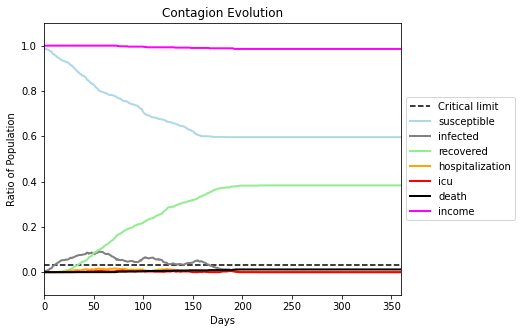

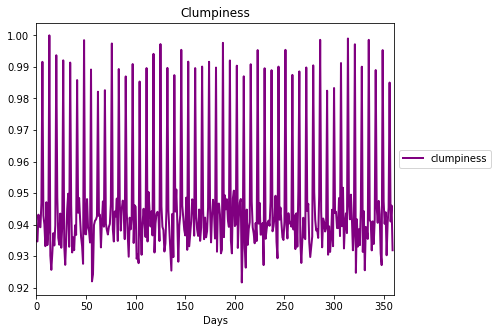

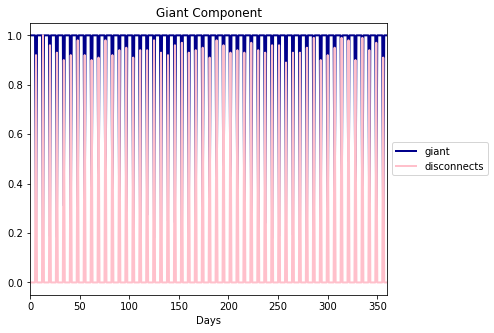

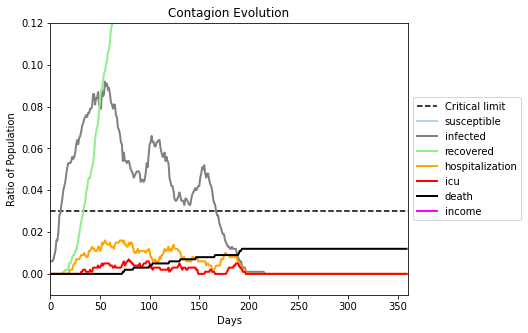

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[2420]
Average similarity between family members is 0.990026656862523 at temperature -0.999
Average similarity between family and home is 0.9998934513261942 at temperature -1
Average similarity between students and their classroom is 0.8453925229548607 at temperature -0.999
Average classroom occupancy is 12.08695652173913 and number classrooms is 23
Average similarity between workers is 0.997733095080603 at temperature -0.999
Average office occupancy is 10.338461538461539 and number offices is 65
Average friend similarity for adults: 0.9978073007247732 for kids: 0.8776811428428278
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total

avg restaurant similarity 0.632400500690143
clumpiness 0.9361163930183533
maxlen 41
giant component 0.9471516815374056
disconnects 0.12
avg restaurant similarity 0.6787921982156527
clumpiness 0.9330020624743309
maxlen 44
giant component 0.9471516815374056
disconnects 0.05
avg restaurant similarity 0.7571792556107648
clumpiness 0.9468141391592028
maxlen 41
giant component 0.8991077556623198
disconnects 0.19
avg restaurant similarity 0.7149082459277922
clumpiness 0.941198477489636
maxlen 37
giant component 0.9471516815374056
disconnects 0.13
avg restaurant similarity 0.7026399095806201
clumpiness 0.9414492761634957
maxlen 37
giant component 0.8991077556623198
disconnects 0.19
avg restaurant similarity 0.6018467752650175
clumpiness 0.9238314195199498
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6466568060480565
clumpiness 0.9822647907647908
maxlen 22
giant component 0.20474137931034483
disconnects 0.88
avg restaurant similarity 0.6874908825495992
clumpiness 0.

clumpiness 0.9484903221528634
maxlen 41
giant component 0.8990384615384616
disconnects 0.17
avg restaurant similarity 0.6247384860770453
clumpiness 0.9450800584948931
maxlen 40
giant component 0.9471153846153846
disconnects 0.13
avg restaurant similarity 0.6254032414651602
clumpiness 0.9843030303030303
maxlen 22
giant component 0.3465132997843278
disconnects 0.88
avg restaurant similarity 0.598806488011808
clumpiness 0.9381402690468673
maxlen 38
giant component 0.8991077556623198
disconnects 0.12
avg restaurant similarity 0.653059107289754
clumpiness 0.9446215962971048
maxlen 40
giant component 0.8990384615384616
disconnects 0.18
avg restaurant similarity 0.61908912579229
clumpiness 0.9351043522105247
maxlen 44
giant component 0.8991077556623198
disconnects 0.16
avg restaurant similarity 0.6378898216749369
clumpiness 0.9401440650934867
maxlen 36
giant component 0.8991077556623198
disconnects 0.21
avg restaurant similarity 0.6530935588018653
clumpiness 0.943659928258477
maxlen 42
giant 

avg restaurant similarity 0.7098874155767539
clumpiness 0.948815260273522
maxlen 39
giant component 0.8991077556623198
disconnects 0.21
avg restaurant similarity 0.6213222108735319
clumpiness 0.9426787390998724
maxlen 37
giant component 0.8991077556623198
disconnects 0.21
avg restaurant similarity 0.6275588670503589
clumpiness 0.9317095489103956
maxlen 36
giant component 0.8991077556623198
disconnects 0.2
avg restaurant similarity 0.6719650964407028
clumpiness 0.9388160519174591
maxlen 42
giant component 0.8988995873452544
disconnects 0.25
avg restaurant similarity 0.6623605096580836
clumpiness 0.9885493443754313
maxlen 23
giant component 0.20287769784172663
disconnects 0.9
avg restaurant similarity 0.6493608015486643
clumpiness 0.9448885622104483
maxlen 45
giant component 0.8991077556623198
disconnects 0.18
avg restaurant similarity 0.655313944910938
clumpiness 0.947908042843267
maxlen 39
giant component 0.8991077556623198
disconnects 0.23
avg restaurant similarity 0.6033595745704217


avg restaurant similarity 0.5557989278118132
clumpiness 0.9401117082743163
maxlen 38
giant component 0.8991077556623198
disconnects 0.2
avg restaurant similarity 0.6650891281378828
clumpiness 0.9359200686912154
maxlen 44
giant component 0.9471153846153846
disconnects 0.07
avg restaurant similarity 0.6692284574943602
clumpiness 0.9424581675553957
maxlen 43
giant component 0.8991077556623198
disconnects 0.18
avg restaurant similarity 0.6290714697167037
clumpiness 0.9298863489181479
maxlen 41
giant component 0.8990384615384616
disconnects 0.18
avg restaurant similarity 0.6439599385998364
clumpiness 0.938707889025029
maxlen 35
giant component 0.8991077556623198
disconnects 0.18
avg restaurant similarity 0.5557570485521578
clumpiness 0.9310664880811492
maxlen 41
giant component 0.8991077556623198
disconnects 0.14
avg restaurant similarity 0.7763669709369411
clumpiness 0.9853454878454878
maxlen 14
giant component 0.1430625449317038
disconnects 0.9
avg restaurant similarity 0.6153589675628465

avg restaurant similarity 0.7012959392759933
clumpiness 0.9332320799780347
maxlen 38
giant component 0.8991077556623198
disconnects 0.18
avg restaurant similarity 0.6259663835835203
clumpiness 0.9397636404161399
maxlen 41
giant component 0.8991077556623198
disconnects 0.17
avg restaurant similarity 0.7121263756913562
clumpiness 0.9910909090909091
maxlen 11
giant component 0.14378145219266714
disconnects 0.95
avg restaurant similarity 0.615704372358388
clumpiness 0.9421416333669791
maxlen 39
giant component 0.8984214138641043
disconnects 0.19
avg restaurant similarity 0.6790462752845889
clumpiness 0.9467060293840392
maxlen 39
giant component 0.9471153846153846
disconnects 0.11
avg restaurant similarity 0.6361048095002141
clumpiness 0.9395704624687875
maxlen 44
giant component 0.9471153846153846
disconnects 0.12
avg restaurant similarity 0.6951046094339183
clumpiness 0.9433914865271157
maxlen 40
giant component 0.8991077556623198
disconnects 0.17
avg restaurant similarity 0.6908519600913

clumpiness 0.9434098816936732
maxlen 39
giant component 0.9471153846153846
disconnects 0.07
avg restaurant similarity 0.6378893571777428
clumpiness 0.9457261999062274
maxlen 40
giant component 0.8990384615384616
disconnects 0.19
avg restaurant similarity 0.6870327777070242
clumpiness 0.9319422301869064
maxlen 40
giant component 0.9471516815374056
disconnects 0.1
avg restaurant similarity 0.7050721465188662
clumpiness 0.9364390901420907
maxlen 39
giant component 0.8991077556623198
disconnects 0.17
avg restaurant similarity 0.6059924461497812
clumpiness 0.9479789262695169
maxlen 46
giant component 0.8990384615384616
disconnects 0.14
avg restaurant similarity 0.6582355359964207
clumpiness 0.9809401154401154
maxlen 20
giant component 0.2516175413371675
disconnects 0.85
avg restaurant similarity 0.7287189862675191
clumpiness 0.9371892191326837
maxlen 40
giant component 0.9471516815374056
disconnects 0.08
avg restaurant similarity 0.6371470482166162
clumpiness 0.9391875980657961
maxlen 34
gi

(<function dict.items>, <function dict.items>, <function dict.items>)

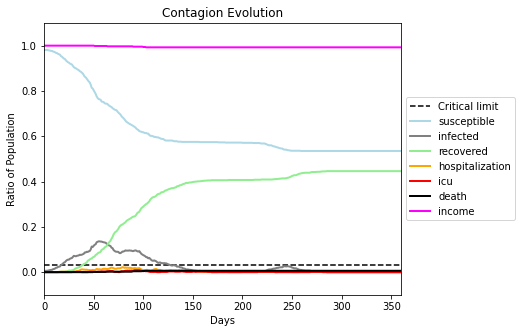

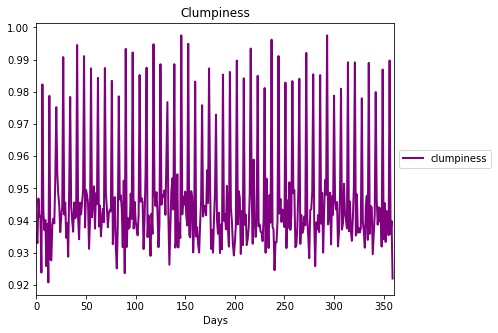

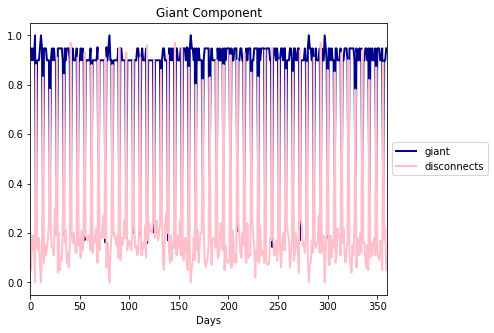

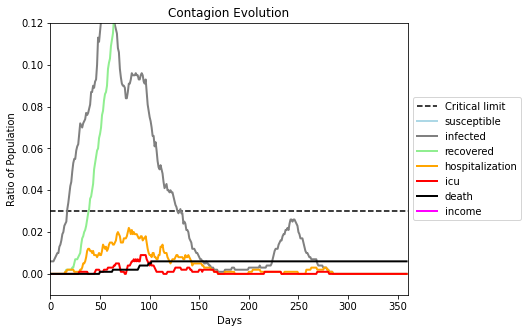

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.999", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )

Save these seeds if you want to rerun a scenario
[9019]
Average similarity between family members is 0.9899819563866584 at temperature -0.998
Average similarity between family and home is 0.9998908809267892 at temperature -1
Average similarity between students and their classroom is 0.749362928862727 at temperature -0.998
Average classroom occupancy is 13.08695652173913 and number classrooms is 23
Average similarity between workers is 0.9700187982777866 at temperature -0.998
Average office occupancy is 10.140625 and number offices is 64
Average friend similarity for adults: 0.9930494423758244 for kids: 0.8290556011067326
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 pe

avg restaurant similarity 0.5587445286039673
clumpiness 0.9193364624104957
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6183808581689112
clumpiness 0.9262130821930752
maxlen 29
giant component 0.9498956158663883
disconnects 0.13
avg restaurant similarity 0.4517543854392437
clumpiness 0.9286674860624979
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4946478947693861
clumpiness 0.9346538439841221
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5945161310660039
clumpiness 0.9317364723503023
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5829358253485724
clumpiness 0.9159093537258018
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4351430909945579
clumpiness 0.9769158721395563
maxlen 19
giant component 0.258557902403496
disconnects 0.83
avg restaurant similarity 0.5769952624406214
clumpiness 0.9293983131537907
maxlen 33
giant component 1.0
disconnects 0.0
a

avg restaurant similarity 0.5133485537613544
clumpiness 0.9377117784367872
maxlen 31
giant component 0.9498956158663883
disconnects 0.12
avg restaurant similarity 0.4409053235881905
clumpiness 0.9245397040918639
maxlen 31
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5600036310530279
clumpiness 0.9205441239685089
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4919128037848088
clumpiness 0.9848965021906199
maxlen 17
giant component 0.21558630735615442
disconnects 0.88
avg restaurant similarity 0.5114897191845656
clumpiness 0.9206502212302703
maxlen 33
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.479524631334186
clumpiness 0.9240966103682804
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44704395133920005
clumpiness 0.9269933199393252
maxlen 31
giant component 0.9498956158663883
disconnects 0.11
avg restaurant similarity 0.6152845824342588
clumpiness 0.9251989489641594
maxlen 31
giant component 1.0

clumpiness 0.9227171714589293
maxlen 30
giant component 0.9498956158663883
disconnects 0.09
avg restaurant similarity 0.46875357981343363
clumpiness 0.9291375533160497
maxlen 35
giant component 0.9498607242339833
disconnects 0.08
avg restaurant similarity 0.47424040689884545
clumpiness 0.976893603544768
maxlen 27
giant component 0.5455207574654042
disconnects 0.7
avg restaurant similarity 0.4485542523375275
clumpiness 0.9261581058891859
maxlen 29
giant component 0.9498607242339833
disconnects 0.09
avg restaurant similarity 0.5368418094331392
clumpiness 0.9230384408813328
maxlen 36
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4629445350724887
clumpiness 0.9316558746765484
maxlen 35
giant component 0.9498956158663883
disconnects 0.09
avg restaurant similarity 0.5020140197040054
clumpiness 0.9315632397138376
maxlen 34
giant component 0.9498607242339833
disconnects 0.15
avg restaurant similarity 0.4426421714165912
clumpiness 0.921543323425533
maxlen 31
giant component 1.

clumpiness 0.9423809168147763
maxlen 41
giant component 0.9498607242339833
disconnects 0.16
avg restaurant similarity 0.47118312819807306
clumpiness 0.9261654731530554
maxlen 32
giant component 0.9498956158663883
disconnects 0.09
avg restaurant similarity 0.5032868551383912
clumpiness 0.9427591099680362
maxlen 36
giant component 0.9498956158663883
disconnects 0.09
avg restaurant similarity 0.5855681269261693
clumpiness 0.9807470624788289
maxlen 35
giant component 0.4650145772594752
disconnects 0.75
avg restaurant similarity 0.5854203005250939
clumpiness 0.9310776147804993
maxlen 33
giant component 0.9498607242339833
disconnects 0.09
avg restaurant similarity 0.6044500504632758
clumpiness 0.9372339483662807
maxlen 34
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5339630138867253
clumpiness 0.938978315737006
maxlen 35
giant component 0.9498956158663883
disconnects 0.14
avg restaurant similarity 0.5458505711958448
clumpiness 0.9311379550913308
maxlen 34
giant component 1

clumpiness 0.9259268150989007
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5976609500858566
clumpiness 0.9268822743200252
maxlen 33
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.49906037931844255
clumpiness 0.964607749218703
maxlen 41
giant component 0.6686088856518573
disconnects 0.54
avg restaurant similarity 0.5181104053066393
clumpiness 0.9255168655341458
maxlen 30
giant component 0.9498956158663883
disconnects 0.07
avg restaurant similarity 0.5727784428094427
clumpiness 0.9358046515697672
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4704636947117656
clumpiness 0.9221581036275783
maxlen 33
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5863372211488259
clumpiness 0.9346999684930981
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4662468737748503
clumpiness 0.9224318656137263
maxlen 41
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5478834947680467


avg restaurant similarity 0.7925124371712086
clumpiness 0.9329942208439614
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6103021059667599
clumpiness 0.9272330597060473
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5572885762615744
clumpiness 0.9266919550506565
maxlen 34
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6133065842126683
clumpiness 0.928261211166256
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.548534474951562
clumpiness 0.9321247814905169
maxlen 31
giant component 0.9498956158663883
disconnects 0.08
avg restaurant similarity 0.5327229540370311
clumpiness 0.9250983259270145
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5974923750962114
clumpiness 0.9620112827638403
maxlen 30
giant component 0.48871085214857973
disconnects 0.66
avg restaurant similarity 0.5190565782831361
clumpiness 0.9339573843411909
maxlen 43
giant component 1.0
disconnects 0.0
a

(<function dict.items>, <function dict.items>, <function dict.items>)

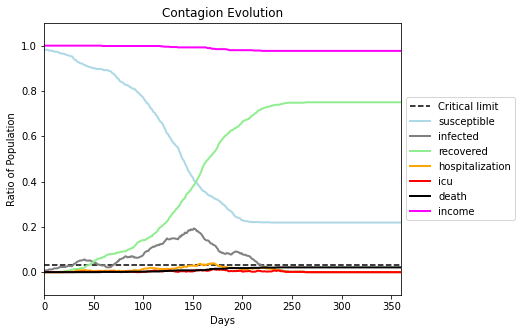

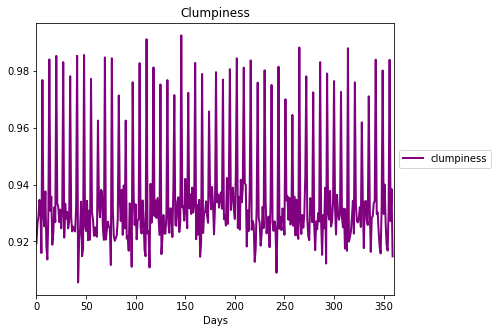

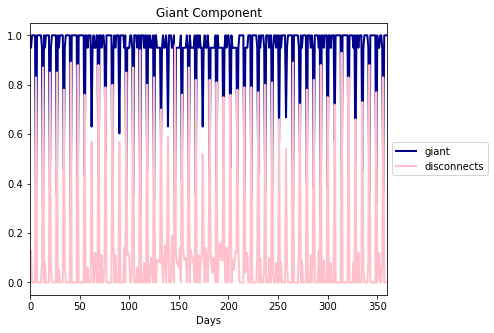

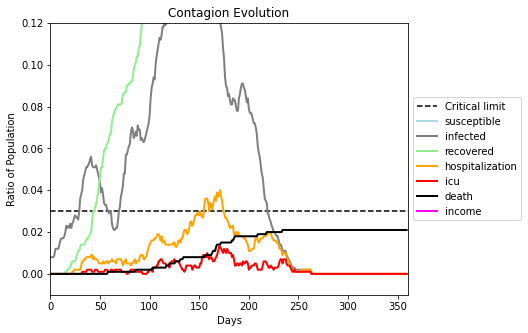

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.998
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.998", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[6965]
Average similarity between family members is 0.9921080497723758 at temperature -0.9975
Average similarity between family and home is 0.9998886665103354 at temperature -1
Average similarity between students and their classroom is 0.7361965199162994 at temperature -0.9975
Average classroom occupancy is 11.541666666666666 and number classrooms is 24
Average similarity between workers is 0.9950866210047062 at temperature -0.9975
Average office occupancy is 10.3125 and number offices is 64
Average friend similarity for adults: 0.9974995029196673 for kids: 0.823089421604473
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 

run with seed 6965:
avg restaurant similarity 0.5104277834522142
clumpiness 0.920095792231186
maxlen 46
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.717904653967979
clumpiness 0.9228442674344325
maxlen 36
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.6846880594868208
clumpiness 0.9318677999186381
maxlen 40
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.5345822650700611
clumpiness 0.9330560946625995
maxlen 33
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.5867887973949916
clumpiness 0.9318073072891138
maxlen 38
giant component 0.9475138121546961
disconnects 0.09
avg restaurant similarity 0.7135435146676744
clumpiness 0.9289408105035282
maxlen 30
giant component 0.9475138121546961
disconnects 0.12
avg restaurant similarity 0.6751642720460197
clumpiness 0.9619973869026347
maxlen 29
giant component 0.5216763005780347
disconnects 0.6
avg restaurant similarity 0

avg restaurant similarity 0.7111029256445748
clumpiness 0.9328360433857676
maxlen 47
giant component 0.9475138121546961
disconnects 0.11
avg restaurant similarity 0.6616199790526678
clumpiness 0.932049602622014
maxlen 33
giant component 0.9475138121546961
disconnects 0.07
avg restaurant similarity 0.6463101509092407
clumpiness 0.974565887540965
maxlen 27
giant component 0.5101156069364162
disconnects 0.69
avg restaurant similarity 0.7146897840175571
clumpiness 0.9314568135948434
maxlen 32
giant component 0.9475138121546961
disconnects 0.07
avg restaurant similarity 0.6479051065759469
clumpiness 0.9294090900611992
maxlen 36
giant component 0.9475138121546961
disconnects 0.06
avg restaurant similarity 0.5809778026329042
clumpiness 0.9246350539596823
maxlen 35
giant component 0.9475138121546961
disconnects 0.09
avg restaurant similarity 0.6467167343771821
clumpiness 0.9305780192363631
maxlen 33
giant component 0.9475138121546961
disconnects 0.1
avg restaurant similarity 0.566087602435564


clumpiness 0.9366976388942247
maxlen 41
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.7327044753158691
clumpiness 0.9292102671818538
maxlen 33
giant component 0.9475138121546961
disconnects 0.07
avg restaurant similarity 0.6155774423097932
clumpiness 0.9249055467423709
maxlen 33
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.583319796298007
clumpiness 0.9177091617014431
maxlen 35
giant component 0.9475138121546961
disconnects 0.06
avg restaurant similarity 0.6288081346168247
clumpiness 0.9285532516275596
maxlen 37
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.5832206333223802
clumpiness 0.977101474119276
maxlen 22
giant component 0.4486994219653179
disconnects 0.77
avg restaurant similarity 0.6058383705304325
clumpiness 0.9304410206790246
maxlen 35
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.6579370808456897
clumpiness 0.930189185955125
maxlen 30
giant

avg restaurant similarity 0.6216387866971552
clumpiness 0.9772287733490848
maxlen 29
giant component 0.5223988439306358
disconnects 0.71
avg restaurant similarity 0.7176996966628615
clumpiness 0.9354971351424253
maxlen 35
giant component 0.9475138121546961
disconnects 0.11
avg restaurant similarity 0.6233286930470299
clumpiness 0.9337709000095171
maxlen 33
giant component 0.9475138121546961
disconnects 0.14
avg restaurant similarity 0.7299909040375878
clumpiness 0.9275142896233862
maxlen 32
giant component 0.9475138121546961
disconnects 0.1
avg restaurant similarity 0.5730926466614158
clumpiness 0.9303769923975056
maxlen 41
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.6792381144767746
clumpiness 0.928051887509245
maxlen 52
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.633966068662977
clumpiness 0.9282014079826915
maxlen 49
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.5230047202748452
c

clumpiness 0.925607916153305
maxlen 29
giant component 0.9475138121546961
disconnects 0.12
avg restaurant similarity 0.6077043628746207
clumpiness 0.919419308935256
maxlen 31
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.6144544527479939
clumpiness 0.9315169308905805
maxlen 35
giant component 0.9475138121546961
disconnects 0.13
avg restaurant similarity 0.5562040719976221
clumpiness 0.9894721445708288
maxlen 27
giant component 0.3930635838150289
disconnects 0.89
avg restaurant similarity 0.6790313952624027
clumpiness 0.9312665012234979
maxlen 42
giant component 0.9475138121546961
disconnects 0.13
avg restaurant similarity 0.57595868925661
clumpiness 0.93187927629849
maxlen 37
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.6942752950532404
clumpiness 0.9317228794918997
maxlen 32
giant component 0.9475138121546961
disconnects 0.14
avg restaurant similarity 0.6881852113692581
clumpiness 0.9217194290419386
maxlen 49
giant com

avg restaurant similarity 0.6101209779777672
clumpiness 0.9315150513683488
maxlen 36
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.580353548076144
clumpiness 0.9142702368364202
maxlen 28
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.7018658312877907
clumpiness 0.9371213458447156
maxlen 43
giant component 0.9475138121546961
disconnects 0.09
avg restaurant similarity 0.6044995739598367
clumpiness 0.9334547232492773
maxlen 37
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.543235995206836
clumpiness 0.9353616855249156
maxlen 42
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.6611146294546547
clumpiness 0.9741728993621608
maxlen 33
giant component 0.4804913294797688
disconnects 0.71
avg restaurant similarity 0.6424557099990373
clumpiness 0.922114522610576
maxlen 34
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.6155880187397436
clu

(<function dict.items>, <function dict.items>, <function dict.items>)

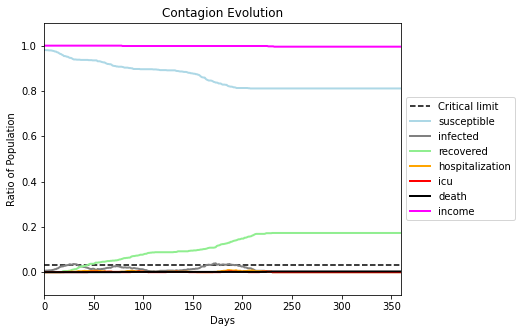

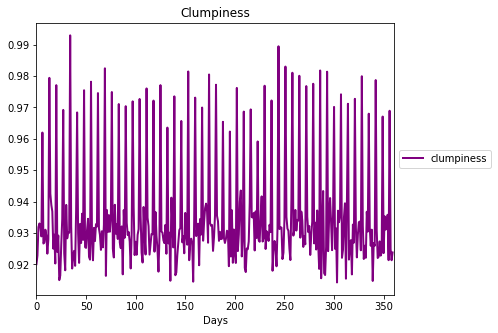

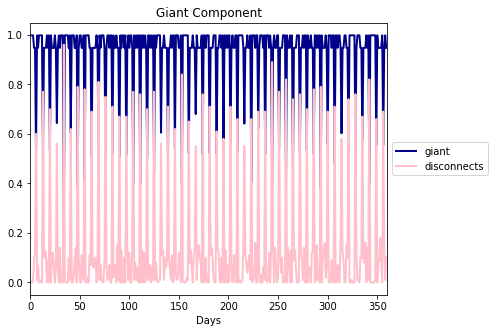

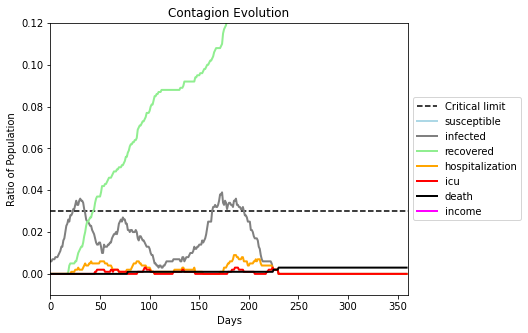

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9975
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.9975", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[509]
Average similarity between family members is 0.9890246844828968 at temperature -0.997
Average similarity between family and home is 0.9998969568233665 at temperature -1
Average similarity between students and their classroom is 0.6675402088843918 at temperature -0.997
Average classroom occupancy is 12.083333333333334 and number classrooms is 24
Average similarity between workers is 0.9914842373124142 at temperature -0.997
Average office occupancy is 10.153846153846153 and number offices is 65
Average friend similarity for adults: 0.9976429412944874 for kids: 0.8125641726618409
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 5 people.
Tot

avg restaurant similarity 0.6969464308762299
clumpiness 0.9186274352022098
maxlen 23
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7757539477609336
clumpiness 0.9256137083740059
maxlen 24
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6448527586519208
clumpiness 0.9160405496069617
maxlen 27
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.7179933363165775
clumpiness 0.9186815002742281
maxlen 24
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7457793905446362
clumpiness 0.9198708906018932
maxlen 29
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6652021713631239
clumpiness 0.9139696134876476
maxlen 25
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6186638873530583
clumpiness 0.9725460601186161
maxlen 39
giant component 0.6976911976911977
disconnects 0.58
avg restaurant similarity 0.6591656792506856
c

clumpiness 0.9070867250224837
maxlen 24
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6858403604016796
clumpiness 0.9144083054028875
maxlen 22
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7621593490605824
clumpiness 0.973360344834194
maxlen 25
giant component 0.5656565656565656
disconnects 0.67
avg restaurant similarity 0.7792458380475696
clumpiness 0.9179373668146216
maxlen 26
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7158165937438956
clumpiness 0.9065464921451024
maxlen 30
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.5732376249939064
clumpiness 0.9156318569631264
maxlen 21
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.6117478123490867
clumpiness 0.9176938063096026
maxlen 23
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.6267936068433688
clumpiness 0.9045667361982479
maxlen 23
giant 

avg restaurant similarity 0.6228536950053797
clumpiness 0.9226471056160752
maxlen 33
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.7518749143794963
clumpiness 0.9139467684018768
maxlen 21
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.8597521490288059
clumpiness 0.9191854412736026
maxlen 27
giant component 0.9972432804962095
disconnects 0.02
avg restaurant similarity 0.6715210549144899
clumpiness 0.9154876048612252
maxlen 24
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.7941715654379283
clumpiness 0.9721222659877526
maxlen 28
giant component 0.5670995670995671
disconnects 0.69
avg restaurant similarity 0.6522800709371294
clumpiness 0.9087730319645955
maxlen 21
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7053938844403301
clumpiness 0.9215264354754293
maxlen 25
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.877365634059414

clumpiness 0.96620656570923
maxlen 36
giant component 0.6919191919191919
disconnects 0.54
avg restaurant similarity 0.7844259354157543
clumpiness 0.9190351365868394
maxlen 25
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.699089859802858
clumpiness 0.9105172107752705
maxlen 24
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.6814911451707897
clumpiness 0.9135241985396785
maxlen 24
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6645861332810332
clumpiness 0.9068517064160321
maxlen 23
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6813530599594086
clumpiness 0.9172009973320379
maxlen 23
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7443945017711057
clumpiness 0.9165631170664487
maxlen 26
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.6771162076281575
clumpiness 0.9612196369725381
maxlen 36
giant co

avg restaurant similarity 0.5881777211927953
clumpiness 0.9098883035907872
maxlen 23
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.7147793006505865
clumpiness 0.9272046033601762
maxlen 26
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.6111544620265044
clumpiness 0.9737783555108313
maxlen 32
giant component 0.6637806637806638
disconnects 0.59
avg restaurant similarity 0.5393645652501963
clumpiness 0.9124357762980055
maxlen 22
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.5746306903431474
clumpiness 0.9090001997206366
maxlen 24
giant component 0.9972432804962095
disconnects 0.02
avg restaurant similarity 0.6252251414084535
clumpiness 0.9198377126978554
maxlen 24
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6224283101666706
clumpiness 0.9103533032174
maxlen 24
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.5699802771562154
cl

clumpiness 0.913257621547176
maxlen 25
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.5574994233569538
clumpiness 0.9131774257431446
maxlen 25
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.6302929388855385
clumpiness 0.9123457386823554
maxlen 25
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.5031178133775855
clumpiness 0.9199266136770008
maxlen 21
giant component 0.9972432804962095
disconnects 0.0
avg restaurant similarity 0.7502544748337385
clumpiness 0.9212444433361616
maxlen 22
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.623741225381638
clumpiness 0.9675136292533052
maxlen 37
giant component 0.6933621933621934
disconnects 0.56
avg restaurant similarity 0.6843182704221821
clumpiness 0.91356109187286
maxlen 23
giant component 0.9972432804962095
disconnects 0.01
avg restaurant similarity 0.6842885073509747
clumpiness 0.9225406211282474
maxlen 25
giant co

(<function dict.items>, <function dict.items>, <function dict.items>)

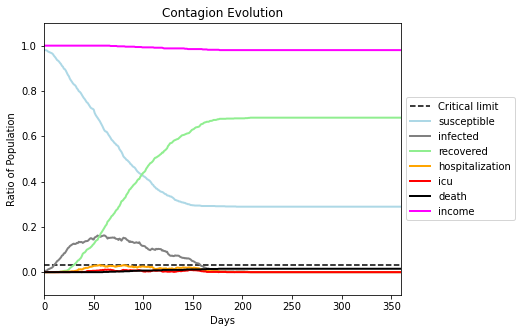

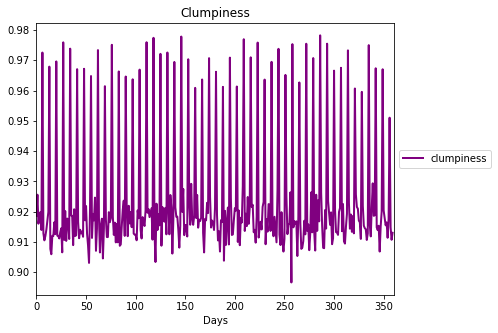

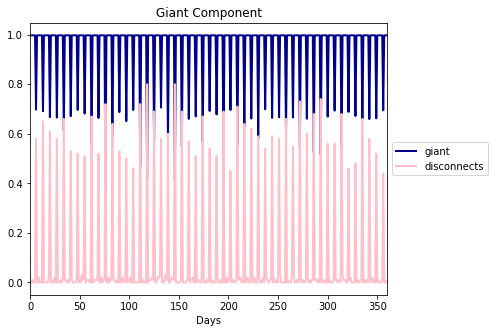

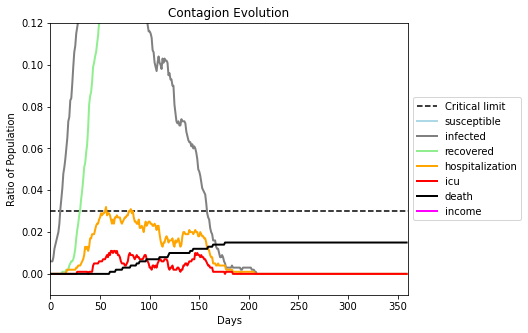

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.997
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.997", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7877]
Average similarity between family members is 0.9876628359200876 at temperature -0.996
Average similarity between family and home is 0.9998882593447554 at temperature -1
Average similarity between students and their classroom is 0.6216540196024836 at temperature -0.996
Average classroom occupancy is 10.958333333333334 and number classrooms is 24
Average similarity between workers is 0.9793834755568686 at temperature -0.996
Average office occupancy is 10.640625 and number offices is 64
Average friend similarity for adults: 0.9947074984982985 for kids: 0.7397162167264321
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 

avg restaurant similarity 0.6044733614479769
clumpiness 0.9183603173253463
maxlen 27
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5167730887769223
clumpiness 0.9169631320390996
maxlen 32
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.6091768690016583
clumpiness 0.917013971477439
maxlen 25
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.538459090574492
clumpiness 0.9234225384299721
maxlen 28
giant component 0.9986329460013671
disconnects 0.03
avg restaurant similarity 0.5627207409171319
clumpiness 0.9210867551770905
maxlen 28
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5304195165253552
clumpiness 0.9104703140095622
maxlen 28
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4820502047585631
clumpiness 0.973091153687676
maxlen 42
giant component 0.5804145818441744
disconnects 0.59
avg restaurant similarity 0.5713880556658232
clu

clumpiness 0.9217767713923355
maxlen 27
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.6609107538114537
clumpiness 0.9169863104015581
maxlen 27
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5706895755682355
clumpiness 0.9712377142644991
maxlen 35
giant component 0.5997140814867763
disconnects 0.63
avg restaurant similarity 0.5422829413465847
clumpiness 0.9227239598786073
maxlen 28
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.6501348065786993
clumpiness 0.9132130659606768
maxlen 30
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.5862409011434614
clumpiness 0.9215867786044291
maxlen 28
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6390096397705314
clumpiness 0.9145930941705778
maxlen 27
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5249284082524859
clumpiness 0.9154545097702287
maxlen 25
gian

avg restaurant similarity 0.6351619098043236
clumpiness 0.9129740776635067
maxlen 29
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6284802499602246
clumpiness 0.9130253819537876
maxlen 28
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5565947509290684
clumpiness 0.9157043004422329
maxlen 26
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5840891039102811
clumpiness 0.9178070177724598
maxlen 30
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.5940042788083673
clumpiness 0.9855625359195826
maxlen 27
giant component 0.5046461758398856
disconnects 0.8
avg restaurant similarity 0.5863616357365572
clumpiness 0.9070568473341021
maxlen 25
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.564543145938549
clumpiness 0.9187744354328014
maxlen 26
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.6736792351769948
cl

clumpiness 0.9850514944692963
maxlen 35
giant component 0.5396711937097927
disconnects 0.8
avg restaurant similarity 0.6116861331730324
clumpiness 0.9298748623361055
maxlen 30
giant component 0.9986329460013671
disconnects 0.02
avg restaurant similarity 0.6177717260470317
clumpiness 0.9241705203330792
maxlen 28
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6318597782947187
clumpiness 0.9256375115608929
maxlen 34
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5352406333960484
clumpiness 0.9227675620913218
maxlen 32
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5491537800173438
clumpiness 0.9184870016247793
maxlen 26
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.703283994317112
clumpiness 0.9234956157620673
maxlen 29
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5629829980551412
clumpiness 0.979071480735803
maxlen 28
giant com

avg restaurant similarity 0.56408543601804
clumpiness 0.9168561039811209
maxlen 24
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4384387165157451
clumpiness 0.9189830732313907
maxlen 27
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6051398987596185
clumpiness 0.9757405168592201
maxlen 31
giant component 0.5947105075053609
disconnects 0.65
avg restaurant similarity 0.6688889181314177
clumpiness 0.9252932518632871
maxlen 31
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.6296225616969187
clumpiness 0.9135174114529032
maxlen 29
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6859693008421552
clumpiness 0.9199245719880396
maxlen 24
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6853324766925087
clumpiness 0.9172827620132128
maxlen 29
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6221368226365074
clu

clumpiness 0.9214850413722973
maxlen 31
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.568115259375058
clumpiness 0.9242208611652278
maxlen 28
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.5620252237694108
clumpiness 0.9200167818782732
maxlen 29
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.6650062051257797
clumpiness 0.9256286645478631
maxlen 26
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.6870497766567474
clumpiness 0.9235380762524793
maxlen 28
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5374923962600874
clumpiness 0.9599993777075446
maxlen 31
giant component 0.6097212294496068
disconnects 0.53
avg restaurant similarity 0.7197091318012117
clumpiness 0.9105746674904898
maxlen 29
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5434597932373011
clumpiness 0.9195951508199254
maxlen 25
giant 

(<function dict.items>, <function dict.items>, <function dict.items>)

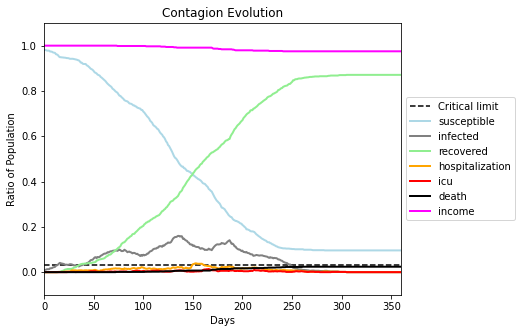

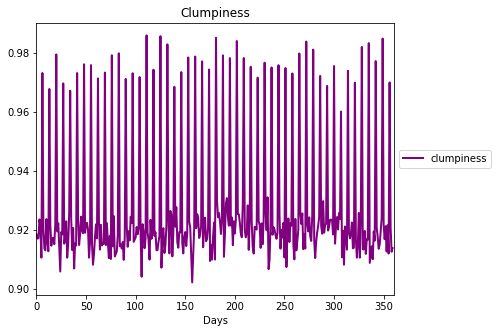

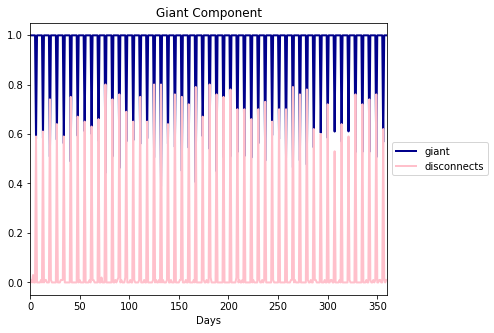

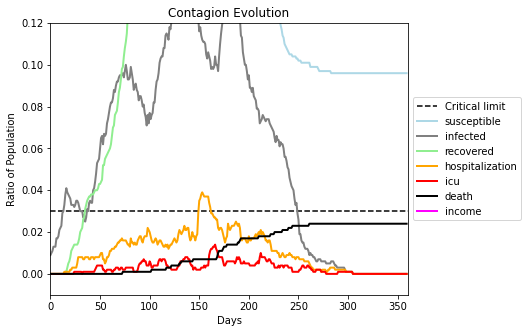

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.996
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.996", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.995
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.995", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[2697]
Average similarity between family members is 0.9851596181129503 at temperature -0.995
Average similarity between family and home is 0.9998935587195518 at temperature -1
Average similarity between students and their classroom is 0.5781731496565216 at temperature -0.995
Average classroom occupancy is 12.416666666666666 and number classrooms is 24
Average similarity between workers is 0.9690298627011737 at temperature -0.995
Average office occupancy is 9.907692307692308 and number offices is 65
Average friend similarity for adults: 0.9888200411272314 for kids: 0.7491483101282929
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tot

run with seed 2697:
avg restaurant similarity 0.5324563662189736


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.994
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.994", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.993
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.993", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.992
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.992", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.991
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.991", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.99", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.98
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.989", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.97
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.97", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )
